In [106]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [83]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df_2020= pd.read_csv (r'full_2020.csv')
df_2019 = pd.read_csv (r'full_2019.csv')
df_2018 = pd.read_csv (r'full_2018.csv')

In [28]:
full.head()

,Spot,date,time,range,height_ft,swell_dir,swell_angle,period_sec,wind_kmh,wind_dir,wind,wind_angle,temp_°c,Conditions,Condition_ratings
0,Nazare,2018-01-01,6am,20-30ft,15.5,WNW,292,15,6,S,Cross/Offshore,186,8,Good,4
1,Nazare,2018-01-01,12pm,18-28ft,14.5,WNW,292,15,14,W,Onshore,277,15,Good,4
2,Nazare,2018-01-01,6pm,18-26ft,13.5,WNW,293,14,6,WSW,Onshore,253,11,Good,4
3,Nazare,2018-02-01,6am,16-26ft,12.5,WNW,297,14,5,SSW,Cross-shore,207,10,Good,4
4,Nazare,2018-02-01,12pm,14-24ft,11.5,WNW,297,14,11,WSW,Onshore,258,16,Good,4


In [4]:
full = pd.concat([df_2018,df_2019,df_2020], ignore_index=True)

In [10]:
full["date"] = pd.to_datetime(full.date)

In [29]:
full.Conditions.value_counts()

Not recommended    9633
Good               9588
Epic               9036
Mediocre           3795
Choppy              828
Name: Conditions, dtype: int64

In [22]:
conditions_rank = {
    'Epic':5, 
    'Good':4, 
    'Mediocre':3, 
    'Choppy':2,
    'Not recommended':1
}

In [27]:
full["Condition_ratings"] = full.Conditions.map(conditions_rank)

In [42]:
def group_by (col):
    full_prueba = full.groupby(["date","Spot"])[f'{col}'].agg("mean")
    df1 = pd.DataFrame(full_prueba)
    df1 = df1.reset_index()
    return df1
    

In [142]:
height = group_by("height_ft")

In [143]:
height

,date,Spot,height_ft
0,2018-01-01,Fronton,3.333333
1,2018-01-01,Itacoatiara,0.800000
2,2018-01-01,Mosca Point,3.666667
3,2018-01-01,Nazare,14.500000
4,2018-01-01,Padang-Padang,5.666667
...,...,...,...
10590,2020-12-31,Padang-Padang,4.000000
10591,2020-12-31,Pipeline,9.000000
10592,2020-12-31,Puerto Escondido,1.833333
10593,2020-12-31,Tauro,0.900000


In [46]:
wind_speed = group_by("wind_kmh")

In [48]:
wind_speed.head()

,date,Spot,wind_kmh
0,2018-01-01,Fronton,19.666667
1,2018-01-01,Itacoatiara,9.666667
2,2018-01-01,Mosca Point,19.666667
3,2018-01-01,Nazare,8.666667
4,2018-01-01,Padang-Padang,12.333333


In [50]:
rating = group_by("Condition_ratings")

In [51]:
rating.head()

,date,Spot,Condition_ratings
0,2018-01-01,Fronton,5.0
1,2018-01-01,Itacoatiara,1.0
2,2018-01-01,Mosca Point,5.0
3,2018-01-01,Nazare,4.0
4,2018-01-01,Padang-Padang,3.0


In [52]:
from statsmodels.tsa.stattools import adfuller

In [54]:
dickey_height = adfuller(height["height_ft"])
dickey_height

(-12.0357021851382,
 2.8066770743884147e-22,
 39,
 10555,
 {'1%': -3.430969695978145,
  '5%': -2.8618138703454576,
  '10%': -2.5669157760426144},
 47202.80708705075)

In [55]:
dickey_wind = adfuller(wind_speed["wind_kmh"])
dickey_wind

(-11.767096491621826,
 1.1123238916061825e-21,
 39,
 10555,
 {'1%': -3.430969695978145,
  '5%': -2.8618138703454576,
  '10%': -2.5669157760426144},
 67831.33577937541)

In [63]:
dickey_condition= adfuller(rating["Condition_ratings"])
dickey_condition

(-9.892108943382373,
 3.535486258522491e-17,
 39,
 10555,
 {'1%': -3.430969695978145,
  '5%': -2.8618138703454576,
  '10%': -2.5669157760426144},
 26799.743742309172)

In [65]:
adf, pvalue, usedlag, nobs, critical_values, icbest = dickey_height

In [66]:
adf

-12.0357021851382

In [67]:
critical_values

{'1%': -3.430969695978145,
 '5%': -2.8618138703454576,
 '10%': -2.5669157760426144}

In [68]:
adf, pvalue, usedlag, nobs, critical_values, icbest = dickey_wind

In [69]:
adf

-11.767096491621826

In [70]:
critical_values

{'1%': -3.430969695978145,
 '5%': -2.8618138703454576,
 '10%': -2.5669157760426144}

In [71]:
adf, pvalue, usedlag, nobs, critical_values, icbest = dickey_condition

In [72]:
adf

-9.892108943382373

In [73]:
critical_values

{'1%': -3.430969695978145,
 '5%': -2.8618138703454576,
 '10%': -2.5669157760426144}

### ARMA

In [144]:
nazare = height[height["Spot"] == "Nazare"]

In [147]:
x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

In [159]:
f = pd.infer_freq(nazare.date)

AttributeError: 'DataFrame' object has no attribute 'date'

In [158]:
nazare = nazare.set_index("date")

In [160]:
nazare.head()

,Spot,height_ft
date,,
2018-01-01,Nazare,14.500000
2018-01-02,Nazare,6.833333
2018-01-03,Nazare,9.833333
2018-01-04,Nazare,4.666667
2018-01-05,Nazare,4.833333


In [155]:
f

'D'

In [156]:
len(x)

1096

In [161]:
nazare.head()

,Spot,height_ft
date,,
2018-01-01,Nazare,14.500000
2018-01-02,Nazare,6.833333
2018-01-03,Nazare,9.833333
2018-01-04,Nazare,4.666667
2018-01-05,Nazare,4.833333


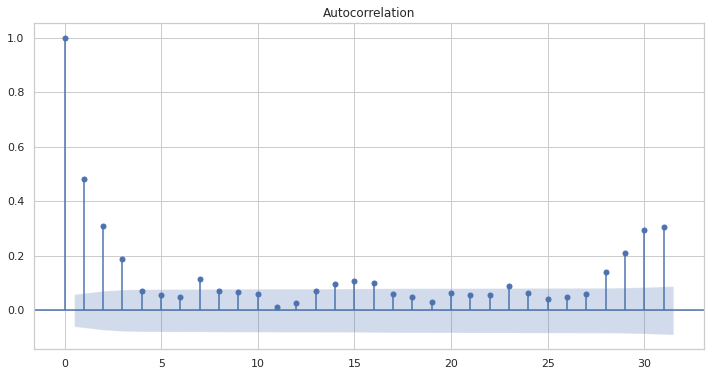

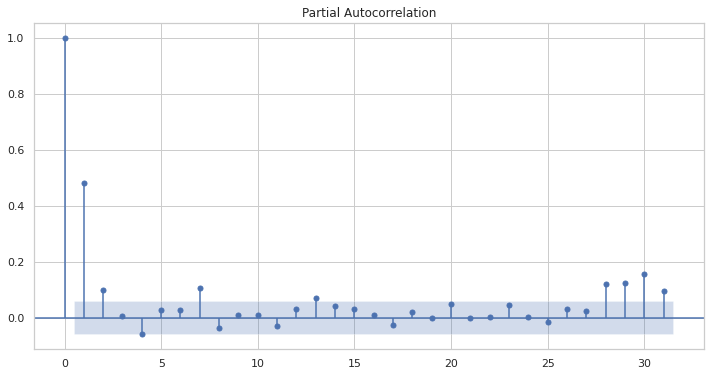

In [162]:
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
plot_acf(nazare["height_ft"]);
plot_pacf(nazare["height_ft"]);
pyplot.show()

In [169]:
orders = (4,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_nazare = ARIMA(nazare['height_ft'], order = orders)
model_nazare;


/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [170]:
arma = model_nazare.fit()
print(arma.summary())


                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                 1096
Model:                     ARMA(4, 3)   Log Likelihood               -2739.845
Method:                       css-mle   S.D. of innovations              2.947
Date:                Tue, 05 Oct 2021   AIC                           5497.690
Time:                        17:42:26   BIC                           5542.685
Sample:                    01-01-2018   HQIC                          5514.715
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3707      0.179     35.575      0.000       6.020       6.722
ar.L1.height_ft     0.0210      0.338      0.062      0.950      -0.641       0.683
ar.L2.height_ft     0.1389      